## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

## Extraction and reforming of Labels
We are extracting required paths of respective files and their labels. Labels are simply the tag or the write answer or correct values corresponding to our sample points. For ex, if our dataset of fruits with 15 apples of red colour, 20 oranges of orange colour etc. then here the word "Apple" is the identification of our data which is of course an apple. 
"Look at this red fruit, it's called an apple!". Yes, a colour is only one feature but this is for understanding purpose only.

In our dataset, there are audio files in which actors speak some words in different tones, thereby expressing different emotions or LABELS. 

## Classes
We have 7 classes or categories within which the dataset is distributed. These are viz. "Happiness", "Neutral", "Anger", "Sad", "Fear", "Boredom" and "Disgus"t. We are reforming or cleansing our data below, meaning we are shaping it to fit our usage. 
Example, in our audio files(wav format) the first file name is "03a01Fa". Guess the label for this? Happiness. 
Actually, this is a german dataset with different letters like "F" representing "Happiness", "A" representing "Fear" etc.. If these were just "F" or "A" it could be easier but one cannot just look at something like "03a02Nc" and say,"The guy is showing no emotion or neutral emotion". Hence, data reforming can help us vastly!!

In [51]:
paths = []
labels = []
for dirname, _, filenames in os.walk(r'C:\Users\Khushal\Downloads\wav'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        #print(filename)
        label = filename.split('01')[-1]
        label1 = label.split('02')[-1]
        label2 = label1.split('04')[-1]
        label3 = label2.split('05')[-1]
        label4 = label3.split('07')[-1]
        label5 = label4.split('03')[-1]
        label6 = label5.split('09')[-1]
        label7 = label6.split('10')[-1]
        label8 = label7.split('.')[0]
        label9 = label8.split('a')[0]
        label10 = label9.split('b')[0]
        label11 = label10.split('c')[0]
        label12 = label11.split('d')[0]
        label13 = label12.split('e')[0]
        label14 = label13.split('f')[0]
        labels.append(label14.lower())
        
print(labels)

['f', 'n', 'w', 'f', 'n', 't', 'w', 'w', 'a', 'f', 'l', 'n', 't', 'w', 'a', 'f', 'n', 't', 'w', 'w', 'f', 'f', 'l', 'n', 'w', 'f', 'l', 'n', 't', 'w', 'w', 'a', 'l', 'n', 't', 'w', 'n', 't', 'w', 'l', 'n', 't', 'w', 'a', 'e', 'n', 'n', 'w', 'w', 'a', 'f', 'l', 'n', 'w', 'w', 'a', 'a', 'f', 'l', 'n', 't', 'w', 'f', 'l', 'n', 't', 'w', 'f', 'l', 'n', 't', 'w', 'f', 'l', 'n', 't', 't', 'w', 'a', 'f', 'f', 'l', 'n', 'w', 'f', 'l', 'n', 't', 'w', 'f', 'l', 'n', 't', 'w', 'a', 'f', 'l', 'n', 't', 'w', 'w', 'a', 'f', 'l', 'n', 't', 'w', 'e', 'f', 'n', 'w', 'e', 'e', 'l', 'w', 'f', 'l', 'n', 'w', 'e', 'l', 'n', 't', 'w', 'w', 'e', 'n', 't', 'w', 'w', 'e', 'n', 'w', 'n', 't', 'w', 'w', 'e', 'f', 'f', 'l', 'n', 't', 'w', 'e', 'n', 'w', 'a', 'n', 'w', 'a', 'n', 'w', 'a', 'f', 'l', 'n', 'w', 'f', 'n', 'w', 'w', 'a', 'l', 't', 'w', 'a', 'a', 'l', 't', 'w', 'a', 'e', 'f', 'l', 'a', 'l', 'n', 'w', 'l', 't', 'w', 'a', 'l', 'w', 'f', 'l', 'w', 'a', 'a', 'l', 'n', 'w', 'e', 'f', 'l', 'n', 't', 'w', 'a',

In [3]:
def len(a):
    c = 0
    for i in a:
        c+=1
    return c

In [4]:
for i in range(len(labels)):
    if labels[i]=='f':
        labels[i] = 'Happy'
    elif labels[i]=='a':
        labels[i] = 'Fear'
    elif labels[i]=='n':
        labels[i] = 'Neutral'
    elif labels[i]=='w':
        labels[i] = 'Anger'
    elif labels[i]=='l':
        labels[i]= 'Boredom'
    elif labels[i]=='t':
        labels[i] = 'Sad'
    elif labels[i]=='e':
        labels[i] = 'Disgust'
print(labels)

['Happy', 'Neutral', 'Anger', 'Happy', 'Neutral', 'Sad', 'Anger', 'Anger', 'Fear', 'Happy', 'Boredom', 'Neutral', 'Sad', 'Anger', 'Fear', 'Happy', 'Neutral', 'Sad', 'Anger', 'Anger', 'Happy', 'Happy', 'Boredom', 'Neutral', 'Anger', 'Happy', 'Boredom', 'Neutral', 'Sad', 'Anger', 'Anger', 'Fear', 'Boredom', 'Neutral', 'Sad', 'Anger', 'Neutral', 'Sad', 'Anger', 'Boredom', 'Neutral', 'Sad', 'Anger', 'Fear', 'Disgust', 'Neutral', 'Neutral', 'Anger', 'Anger', 'Fear', 'Happy', 'Boredom', 'Neutral', 'Anger', 'Anger', 'Fear', 'Fear', 'Happy', 'Boredom', 'Neutral', 'Sad', 'Anger', 'Happy', 'Boredom', 'Neutral', 'Sad', 'Anger', 'Happy', 'Boredom', 'Neutral', 'Sad', 'Anger', 'Happy', 'Boredom', 'Neutral', 'Sad', 'Sad', 'Anger', 'Fear', 'Happy', 'Happy', 'Boredom', 'Neutral', 'Anger', 'Happy', 'Boredom', 'Neutral', 'Sad', 'Anger', 'Happy', 'Boredom', 'Neutral', 'Sad', 'Anger', 'Fear', 'Happy', 'Boredom', 'Neutral', 'Sad', 'Anger', 'Anger', 'Fear', 'Happy', 'Boredom', 'Neutral', 'Sad', 'Anger', 'Dis

In [5]:
paths[:5]

['C:\\Users\\Khushal\\Downloads\\wav\\03a01Fa.wav',
 'C:\\Users\\Khushal\\Downloads\\wav\\03a01Nc.wav',
 'C:\\Users\\Khushal\\Downloads\\wav\\03a01Wa.wav',
 'C:\\Users\\Khushal\\Downloads\\wav\\03a02Fc.wav',
 'C:\\Users\\Khushal\\Downloads\\wav\\03a02Nc.wav']

In [7]:
labels[:5]

['Happy', 'Neutral', 'Anger', 'Happy', 'Neutral']

## Creating our dataframe

In [8]:
df = pd.DataFrame()
df['speech_path'] = paths
df['label'] = labels
df.head()

,speech_path,label
0,C:\Users\Khushal\Downloads\wav\03a01Fa.wav,Happy
1,C:\Users\Khushal\Downloads\wav\03a01Nc.wav,Neutral
2,C:\Users\Khushal\Downloads\wav\03a01Wa.wav,Anger
3,C:\Users\Khushal\Downloads\wav\03a02Fc.wav,Happy
4,C:\Users\Khushal\Downloads\wav\03a02Nc.wav,Neutral


In [9]:
df.shape

(535, 2)

In [10]:
df['label'].value_counts()


Anger      127
Boredom     81
Neutral     79
Happy       71
Fear        69
Sad         62
Disgust     46
Name: label, dtype: int64

## Plots
Plots like countplot can be really helpful to visualize categorial information.

C:\Users\Khushal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


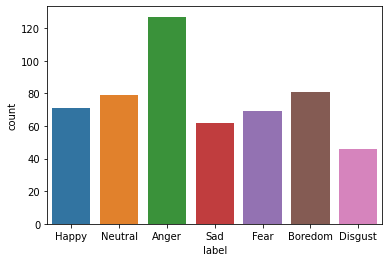

In [52]:
sns.countplot(df['label'])
plt.show()

In [53]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (12,6))
    plt.title(emotion, size = 15)
    librosa.display.waveshow(data, sr = sr)
    plt.show()

def spectogram(data, sr, emotion):
    k = librosa.stft(data)
    kdb = librosa.amplitude_to_db(k)
    plt.figure(figsize = (12,6))
    plt.title(emotion, size = 15)
    librosa.display.specshow(k, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.show()

## Waveplot
A waveplot is a visual representation of a waveform that shows how the audio signal changes with time. The plot is done taking the amplitude of the audio signal on the y-axis/vertical axis and the time is taken to be the x-axis/horizontal axis.

## Spectogram
It is a visual representation of the various frequencies present in an audio signal over time. A spectogram shows us the intensity with which the different frequencies changes as time proceeds ahead. 
Below in the plot, the vertical axis represents frequency, horizontal axis represents time and the colour shading shoes the intensity of a frequency at a given point in time.

Below in the plots, the first one is of WAVEPLOT.
Second one is SPECTOGRAM.

C:\Users\Khushal\Downloads\wav\03a01Fa.wav


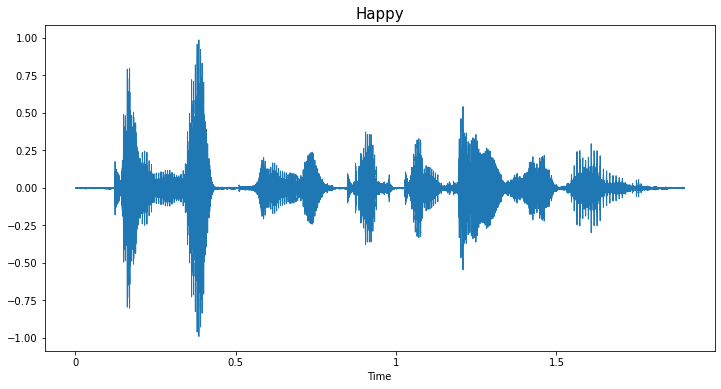

C:\Users\Khushal\AppData\Local\Temp/ipykernel_23468/3674879909.py:9: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  kdb = librosa.amplitude_to_db(k)
C:\Users\Khushal\AppData\Local\Temp/ipykernel_23468/3674879909.py:12: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(k, sr = sr, x_axis = 'time', y_axis = 'hz')


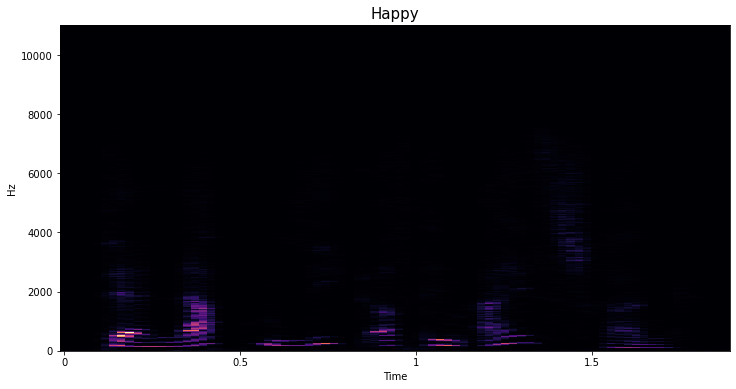

In [13]:
emotion = 'Happy'
path = np.array(df['speech_path'][df['label'] == emotion])[0]
print(path)
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

C:\Users\Khushal\Downloads\wav\03a01Wa.wav


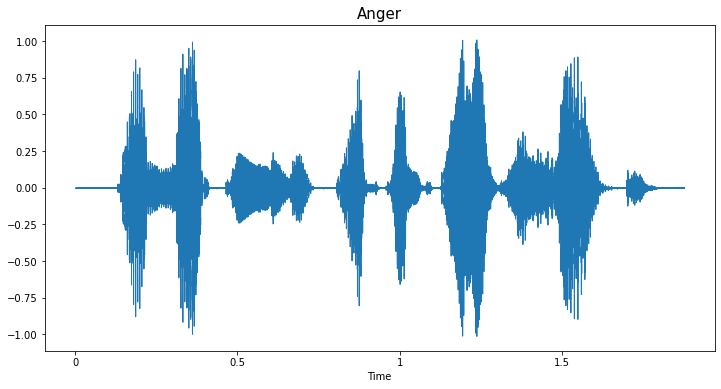

C:\Users\Khushal\AppData\Local\Temp/ipykernel_23468/3674879909.py:9: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  kdb = librosa.amplitude_to_db(k)
C:\Users\Khushal\AppData\Local\Temp/ipykernel_23468/3674879909.py:12: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(k, sr = sr, x_axis = 'time', y_axis = 'hz')


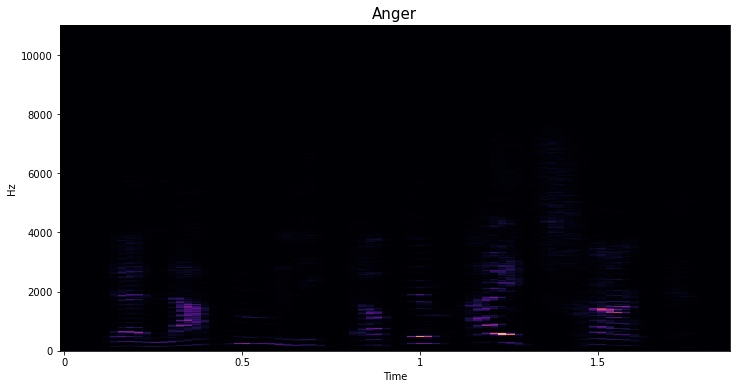

In [55]:
emotion = 'Anger'
path = np.array(df['speech_path'][df['label'] == emotion])[0]
print(path)
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [17]:
 def extract_mfcc(filename):
        x, sr = librosa.load(filename)
        mfccs_features = librosa.feature.mfcc(y = x, sr = sr, n_mfcc = 100)
        scaled_mfccs_features = np.mean(mfccs_features.T, axis = 0)
        return scaled_mfccs_features

In [18]:
extract_mfcc(df['speech_path'][0])

array([-2.8182755e+02,  1.1566022e+02, -3.4362541e+01,  4.9361916e+01,
       -2.0325697e+01,  2.1889788e+01, -2.2197628e+01,  3.6404276e-01,
       -7.6366296e+00, -2.6858647e+00,  3.9497707e+00, -9.4871998e+00,
        3.9580743e+00, -7.8138165e+00,  6.7303987e+00, -6.0051761e+00,
       -1.3350322e+00, -1.9529366e+00,  3.3905447e-04, -3.6459286e+00,
       -2.5478876e+00,  3.5445054e+00, -6.3731475e+00,  1.9698088e+00,
       -2.6362650e+00,  4.5006376e-02, -8.8378322e-01,  7.6898074e-01,
        1.3945158e+00,  1.1533999e+00,  2.4976976e+00,  1.9652650e+00,
        1.1215920e+00, -6.7515785e-01,  3.2452989e+00, -1.8143911e+00,
        2.6069095e+00,  1.3385957e+00,  1.4898274e+00,  3.6493981e+00,
        2.3369417e+00,  2.7783995e+00,  1.6234354e+00,  1.6365147e+00,
       -4.9565920e-01,  1.5328515e+00, -4.1522482e-01,  2.4543562e+00,
        6.2793893e-01,  3.5408717e-01,  1.4605190e+00, -3.8238975e-01,
        1.2620280e+00,  4.3862453e-01,  2.2660892e+00, -7.2110072e-02,
      

In [19]:
X_mfcc = df['speech_path'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc[:5]

0    [-281.82755, 115.66022, -34.36254, 49.361916, ...
1    [-266.7062, 142.34709, -28.770617, 44.473583, ...
2    [-231.332, 92.091034, -65.01426, 35.773846, -2...
3    [-259.10413, 88.49697, -34.979893, 36.832603, ...
4    [-251.27467, 132.527, -22.156742, 53.080475, -...
Name: speech_path, dtype: object

In [21]:
extracted_features = []
extracted_features.append([X_mfcc,df['label']])

In [22]:
extracted_features

[[0      [-281.82755, 115.66022, -34.36254, 49.361916, ...
  1      [-266.7062, 142.34709, -28.770617, 44.473583, ...
  2      [-231.332, 92.091034, -65.01426, 35.773846, -2...
  3      [-259.10413, 88.49697, -34.979893, 36.832603, ...
  4      [-251.27467, 132.527, -22.156742, 53.080475, -...
                               ...                        
  530    [-243.1326, 87.34125, -30.290258, 63.970875, -...
  531    [-237.47574, 87.58244, -23.452282, 57.13645, -...
  532    [-276.20096, 83.68103, -18.921598, 60.968796, ...
  533    [-338.44012, 60.204567, -74.34618, 58.65564, -...
  534    [-249.8714, 60.868397, -75.883316, 59.428677, ...
  Name: speech_path, Length: 535, dtype: object,
  0        Happy
  1      Neutral
  2        Anger
  3        Happy
  4      Neutral
          ...   
  530    Boredom
  531        Sad
  532        Sad
  533      Anger
  534      Anger
  Name: label, Length: 535, dtype: object]]

In [23]:
extracted_features_df = pd.DataFrame()

In [24]:
extracted_features_df['feature'] = X_mfcc
extracted_features_df['label'] = df['label']

In [25]:
extracted_features_df.head()

,feature,label
0,"[-281.82755, 115.66022, -34.36254, 49.361916, ...",Happy
1,"[-266.7062, 142.34709, -28.770617, 44.473583, ...",Neutral
2,"[-231.332, 92.091034, -65.01426, 35.773846, -2...",Anger
3,"[-259.10413, 88.49697, -34.979893, 36.832603, ...",Happy
4,"[-251.27467, 132.527, -22.156742, 53.080475, -...",Neutral


## Making the model

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['label'].tolist())

In [28]:
X.shape

(535, 100)

In [29]:
y.shape

(535,)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
X_train.shape

(428, 100)

In [32]:
y_train.shape

(428,)

In [33]:
X_test.shape

(107, 100)

In [34]:
y_train.shape

(428,)

In [35]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
rbf = svm.SVC(kernel = 'rbf').fit(X_train,y_train)

In [37]:
rbf_pred = rbf.predict(X_test)

In [39]:
cm = confusion_matrix(y_test,rbf_pred)
cm.shape

(7, 7)

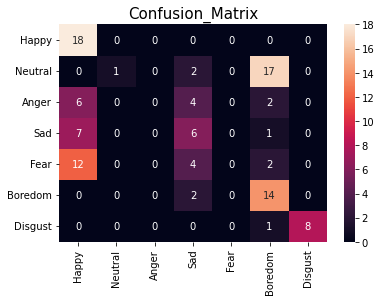

In [40]:
sns.heatmap(cm, annot = True, xticklabels = ['Happy','Neutral','Anger','Sad','Fear','Boredom','Disgust'], yticklabels = ['Happy','Neutral','Anger','Sad','Fear','Boredom','Disgust'])
plt.title("Confusion_Matrix", size = 15)
plt.show()

In [41]:
rbf_accuracy = accuracy_score(y_test,rbf_pred)
print("Accuracy : ",rbf_accuracy*100)

Accuracy :  43.925233644859816


In above svm classifier we saw that the accuracy of the model is not good enough, it classifies much of the sample points worngly. To deal with these we use the technique of Ensemble Learning.

## Ensemble Learning
Ensemble Learning is a powerful tool that can give better results because unlike traditional classifiers it uses estimators also called as Weak Learners, these learners are trained on the given dataset and one by one they give their results i.e. how well the classification happened. Incrementally, the second learner uses= the mistakes made by forst learner and provides a better answer. Hence, an optimal number of estimators can give us desired results.

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gbc = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.9, max_depth = 1.0)

In [44]:
gbc_model = gbc.fit(X_train, y_train)

In [46]:
gbc_pred = gbc_model.predict(X_test)

In [48]:
gbc_accuracy = accuracy_score(y_test,gbc_pred)

In [56]:
cm1 = confusion_matrix(y_test, gbc_pred)

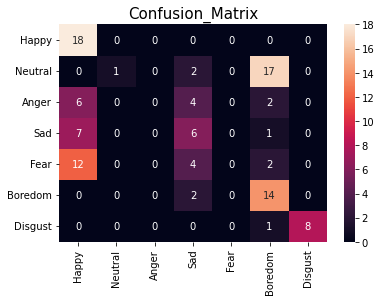

In [57]:
sns.heatmap(cm, annot = True, xticklabels = ['Happy','Neutral','Anger','Sad','Fear','Boredom','Disgust'], yticklabels = ['Happy','Neutral','Anger','Sad','Fear','Boredom','Disgust'])
plt.title("Confusion_Matrix", size = 15)
plt.show()

In [50]:
print(f"Accuracy for Gradient Boosting Algorithm is : {gbc_accuracy*100}")

Accuracy for Gradient Boosting Algorithm is : 70.09345794392523
